In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score
from imblearn.over_sampling import SMOTE
import joblib
import sys, os

sys.path.append('../src')
from preprocessing_fraud import load_and_preprocess_data

In [2]:
# Cell 2: Load data
X_train, X_test, y_train, y_test = load_and_preprocess_data('../data/creditcard.csv')

In [3]:
# Cell 3: Handle imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [7]:
# Cell 4: Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_smote, y_train_smote)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.82      0.84        98

    accuracy                           1.00     56962
   macro avg       0.93      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9778123492644103
PR-AUC: 0.872747174332149


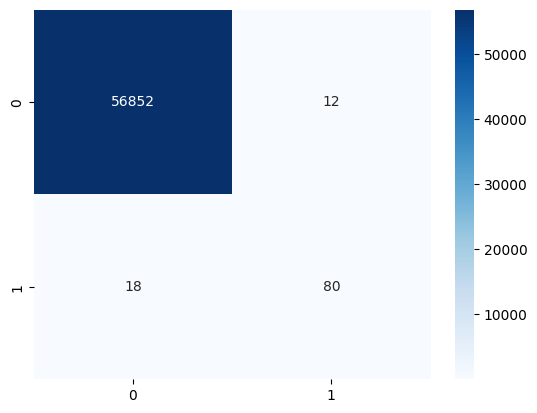

In [8]:
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
print("PR-AUC:", average_precision_score(y_test, y_pred_proba))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()

In [ ]:
joblib.dump(rf, '../models/fraud_detection_model.joblib')